In [12]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten,Dense

In [15]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

In [16]:
print('X_train shape:',X_train_full.shape)
print('y_train shape:',y_train_full.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


## Validation and Scaling

In [17]:
X_valid,X_train = X_train_full[:5000]/255.0 , X_train_full[5000:]/255.0
y_valid,y_train = y_train_full[:5000] , y_train_full[5000:]

In [18]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [19]:
model = Sequential([
  Flatten(input_shape = [28,28]),
  Dense(300, activation = "relu"),
  Dense(100, activation = "relu"),
  Dense(10, activation = "softmax")
])

c:\Python3.13\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(
  loss = "sparse_categorical_crossentropy",
  optimizer = "sgd",
  metrics = ["accuracy"]

)

In [22]:
history = model.fit(
  X_train,y_train,
  epochs = 30,
  validation_data = (X_valid,y_valid),
  verbose = 1
)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7663 - loss: 0.7145 - val_accuracy: 0.8326 - val_loss: 0.5033
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.8286 - loss: 0.4908 - val_accuracy: 0.8440 - val_loss: 0.4545
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8443 - loss: 0.4456 - val_accuracy: 0.8246 - val_loss: 0.4850
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8527 - loss: 0.4197 - val_accuracy: 0.7804 - val_loss: 0.5734
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8610 - loss: 0.3978 - val_accuracy: 0.8604 - val_loss: 0.4081
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8662 - loss: 0.3811 - val_accuracy: 0.8710 - val_loss: 0.3734
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8711 - loss: 0.3670 - val_accuracy: 0.8724 - val_loss: 0.3648
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8756 - loss: 0

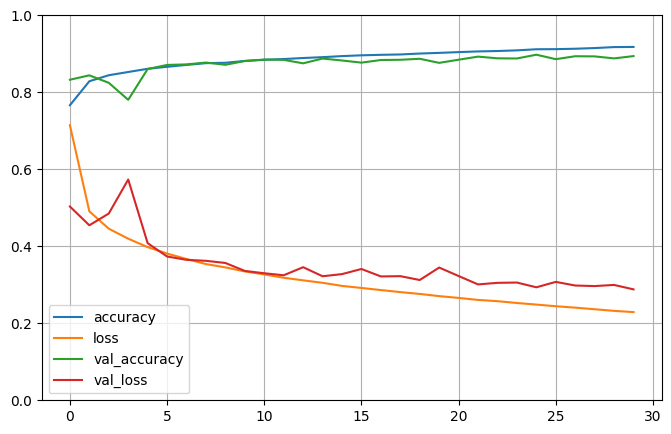

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [29]:
X_new = X_test[:3]             # Take 3 new test images
y_proba = model.predict(X_new) # Get predicted probabilities

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


In [30]:
y_proba

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [33]:
import numpy as np
y_pred = np.argmax(y_proba, axis=-1)
y_pred

array([9, 2, 1])

In [34]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

np.array(class_names)[y_pred]


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [35]:
y_new = y_test[:3]
print(y_new)     # true class indices
print(y_pred)    # predicted class indices

[9 2 1]
[9 2 1]


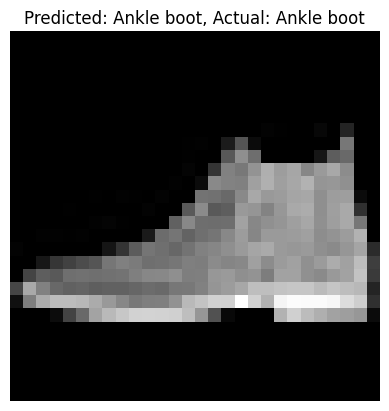

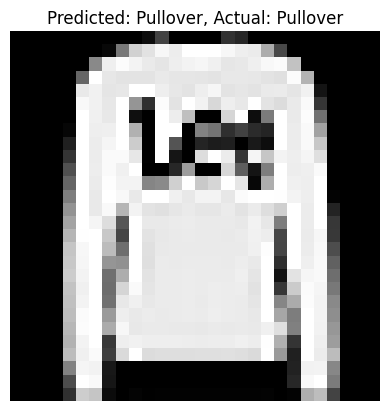

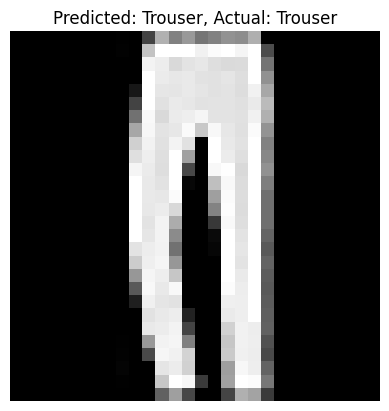

In [38]:
for i in range(3):
    plt.imshow(X_new[i], cmap="gray")
    plt.title(f"Predicted: {class_names[y_pred[i]]}, Actual: {class_names[y_new[i]]}")
    plt.axis("off")
    plt.show()
